Problem Statement:
To predict Air Quality Index (AQI) using meteorological parameters such as temperature, humidity, rainfall, wind speed, pressure, and cloud cover across Indian cities.


STEP 1: FEATURE SELECTION
Temperature_Avg (°C)

Humidity (%)

Rainfall (mm)

Wind_Speed (km/h)

Pressure (hPa)

Cloud_Cover (%)

Target (y)

AQI

STEP 2: DATA CLEANING FOR ML

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("Indian_Climate_Dataset_2024_2025.csv")

# Select features
features = [
    'Temperature_Avg (°C)',
    'Humidity (%)',
    'Rainfall (mm)',
    'Wind_Speed (km/h)',
    'Pressure (hPa)',
    'Cloud_Cover (%)'
]

target = 'AQI'

# Drop missing values
df_ml = df[features + [target]].dropna()

X = df_ml[features]
y = df_ml[target]


STEP 3: TRAIN–TEST SPLIT

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


STEP 4: FEATURE SCALING

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


MODEL 1 — LINEAR REGRESSION

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [16]:
y_pred_lr = lr.predict(X_test_scaled)


STEP 5: MODEL EVALUATION

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Results")
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


Linear Regression Results
MAE: 77.31456420696529
RMSE: 89.20149531698105
R² Score: -0.0031411635957949713


STEP 6: ACTUAL vs PREDICTED PLOT

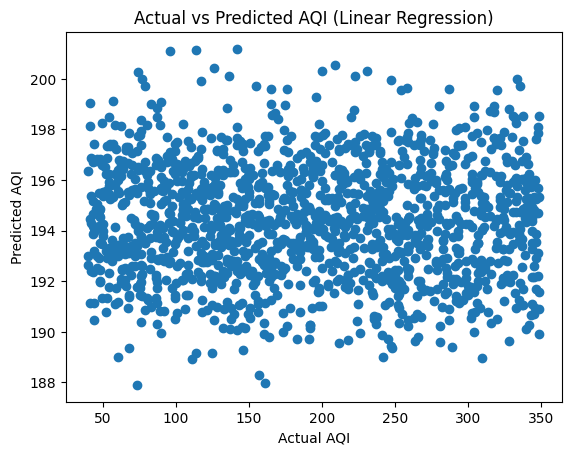

In [20]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (Linear Regression)")
plt.show()
